# Chargement des donn√©es d‚Äôimages

Jusqu‚Äô√† pr√©sent, nous avons travaill√© avec des ensembles de donn√©es assez artificiels, peu repr√©sentatifs des projets r√©els.  
Dans la pratique, vous serez souvent amen√© √† manipuler des **images de grande taille**, comme celles issues d‚Äôappareils photo ou de t√©l√©phones portables.  
Dans ce notebook, nous verrons comment **charger des images** et les utiliser pour **entra√Æner des r√©seaux de neurones**.

Nous utiliserons un [jeu de donn√©es de photos de chats et de chiens](https://www.kaggle.com/c/dogs-vs-cats) disponible sur **Kaggle**.  
Voici quelques exemples d‚Äôimages :



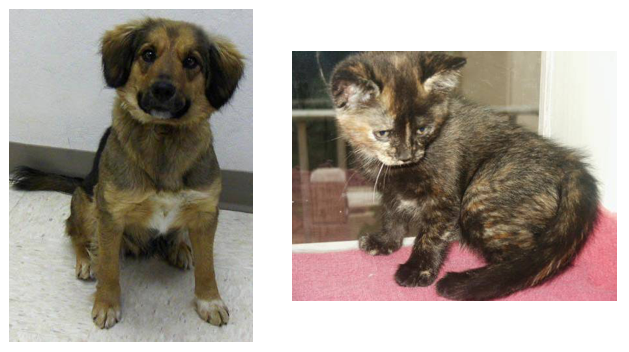

Nous emploierons ce jeu de donn√©es pour entra√Æner un r√©seau de neurones capable de **distinguer les chats des chiens**.  
Aujourd‚Äôhui, cela peut sembler banal, mais il y a encore quelques ann√©es, c‚Äô√©tait un v√©ritable **d√©fi pour les syst√®mes de vision par ordinateur**.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper


La fa√ßon la plus simple de charger des images est d‚Äôutiliser `datasets.ImageFolder` de la biblioth√®que **torchvision** ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)).  
En g√©n√©ral, vous utiliserez `ImageFolder` comme ceci :

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
````

o√π `'path/to/data'` est le chemin d‚Äôacc√®s au r√©pertoire contenant les donn√©es, et `transform` est une **s√©quence d‚Äôop√©rations de pr√©traitement** d√©finies √† l‚Äôaide du module [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) de `torchvision`.

`ImageFolder` s‚Äôattend √† une structure de r√©pertoires comme celle-ci :

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

Chaque classe (ici `cat` et `dog`) poss√®de son **propre dossier** contenant les images correspondantes.
Les images sont alors automatiquement **√©tiquet√©es** d‚Äôapr√®s le nom du dossier.
Ainsi, l‚Äôimage `123.png` sera charg√©e avec l‚Äô√©tiquette `cat`.

Vous pouvez t√©l√©charger le jeu de donn√©es d√©j√† structur√© de cette mani√®re [ici](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip).
Il est d√©j√† s√©par√© en **jeu d‚Äôentra√Ænement** et **jeu de test**.

---

### üîÑ Transformations

Lors du chargement des donn√©es avec `ImageFolder`, il faut d√©finir des **transformations (transforms)**.
Par exemple, les images ont des tailles diff√©rentes, mais le mod√®le n√©cessite qu‚Äôelles aient toutes la m√™me taille pour l‚Äôentra√Ænement.
On peut donc :

* les **redimensionner** avec `transforms.Resize()`, ou
* les **rogner** avec `transforms.CenterCrop()` ou `transforms.RandomResizedCrop()`.

Il faut √©galement **convertir les images en tenseurs PyTorch** √† l‚Äôaide de `transforms.ToTensor()`.

En g√©n√©ral, ces √©tapes sont combin√©es en un pipeline √† l‚Äôaide de `transforms.Compose()`, qui ex√©cute une liste de transformations dans l‚Äôordre.
Par exemple, pour redimensionner, recadrer, puis convertir en tenseur :

```python
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
```

Il existe de nombreuses autres transformations possibles ‚Äî consultez la [documentation](http://pytorch.org/docs/master/torchvision/transforms.html) pour plus de d√©tails.

---

### üì¶ Data Loaders

Une fois le `ImageFolder` charg√©, il faut le passer √† un [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader).
Le **DataLoader** prend un dataset (par exemple celui renvoy√© par `ImageFolder`) et retourne des **lots (batches)** d‚Äôimages et leurs **√©tiquettes** correspondantes.
Vous pouvez r√©gler plusieurs param√®tres, comme :

* la **taille des lots (`batch_size`)**,
* et le **m√©lange des donn√©es (`shuffle`)** √† chaque √©poque.

Exemple :

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

L‚Äôobjet `dataloader` est un **g√©n√©rateur**.
Pour extraire des donn√©es, on peut soit boucler dessus, soit le convertir en it√©rateur et appeler `next()` :

```python
# Boucle pour r√©cup√©rer un batch √† chaque it√©ration
for images, labels in dataloader:
    pass

# Obtenir un seul batch
images, labels = next(iter(dataloader))
```

---

> **Exercice :**
> Chargez les images depuis le dossier `Cat_Dog_data/train`,
> d√©finissez quelques transformations,
> puis construisez le **DataLoader**.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# setting working Directory
import os
os.chdir('cat_dog_image_classification')

In [4]:
%ls

Cat_Dog_data/
Part 7 - Loading Image Data (exo)_v2.ipynb
__MACOSX/
helper.py


In [8]:
cd ..

/Users/jiby/Documents/Wrangler/Mbodj DL


In [9]:
data_dir = 'cat_dog_image_classification/Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

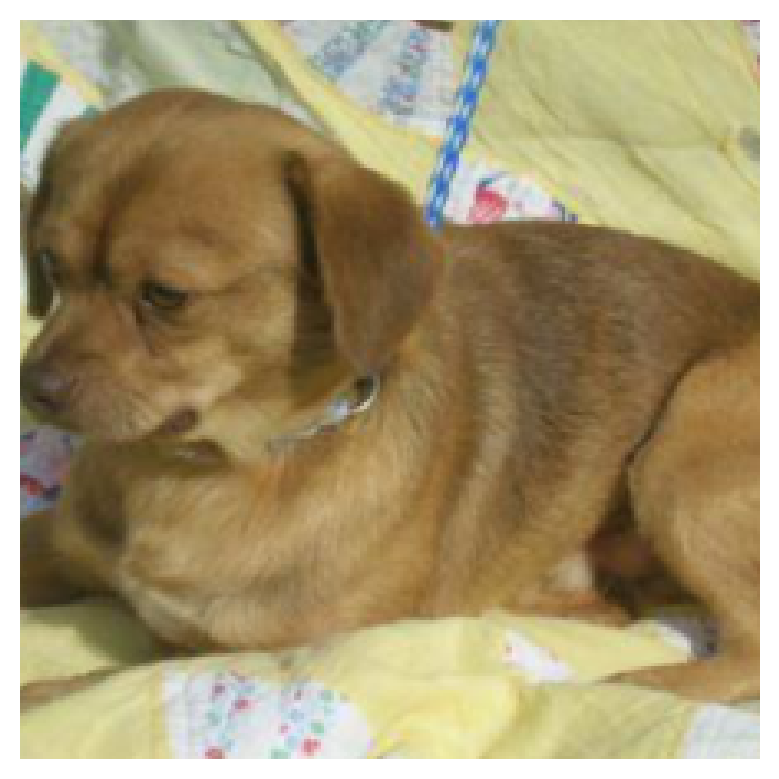

In [11]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

Si vous avez correctement charg√© les donn√©es, vous devriez obtenir un affichage similaire √† celui-ci (votre image sera diff√©rente) :




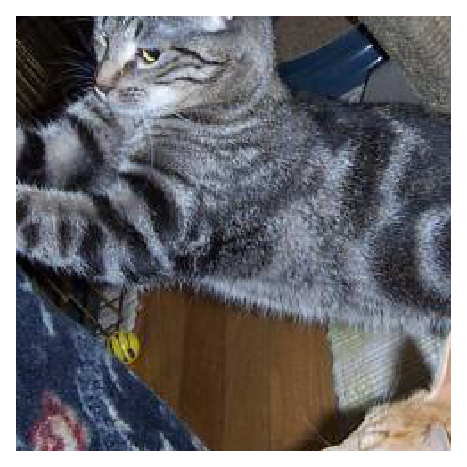


## Augmentation de Donn√©es

Une strat√©gie courante pour entra√Æner des r√©seaux de neurones consiste √† introduire une **certaine forme d‚Äôal√©atoire dans les donn√©es d‚Äôentr√©e**.  
Par exemple, on peut faire tourner, refl√©ter, redimensionner et/ou rogner al√©atoirement les images pendant l‚Äôentra√Ænement.  
Cela aide le r√©seau √† **mieux g√©n√©raliser**, car il voit les m√™mes images sous diff√©rentes formes : positions, tailles, orientations, etc.

Pour appliquer une rotation, un recadrage et un redimensionnement al√©atoires, puis retourner les images horizontalement, on peut d√©finir les transformations ainsi :

```python
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
````

Il est √©galement recommand√© de **normaliser les images** √† l‚Äôaide de `transforms.Normalize`.
Cette transformation prend en entr√©e :

* une liste de **moyennes** (`mean`)
* et une liste d‚Äô**√©carts-types** (`std`)

Chaque canal de couleur est alors normalis√© selon la formule :

```
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

Soustraire la moyenne recentre les donn√©es autour de z√©ro,
et diviser par l‚Äô√©cart-type comprime les valeurs entre **-1 et 1**.
Cette normalisation aide √† maintenir les **poids du r√©seau proches de z√©ro**,
rendant ainsi la **r√©tropropagation plus stable**.
Sans normalisation, le r√©seau risque souvent d‚Äô√©chouer √† apprendre correctement.

Vous pouvez consulter la **liste compl√®te des transformations disponibles** [ici](http://pytorch.org/docs/0.3.0/torchvision/transforms.html).

Lors des phases de **validation** ou de **test**, on utilise g√©n√©ralement des images **non alt√©r√©es** (hormis la normalisation).
Ainsi, pour les donn√©es de validation ou de test, on se contente en g√©n√©ral de **redimensionner** et **recadrer** les images.

---

> **Exercice :**
> D√©finissez ci-dessous les **transformations** pour les donn√©es d‚Äôentra√Ænement et de test.
> Ne mettez pas encore la normalisation.

```



In [12]:
data_dir = 'cat_dog_image_classification/Cat_Dog_data'

# Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [13]:
# change this to the trainloader or testloader
data_iter = iter(trainloader)

In [14]:
images, labels = next(data_iter)
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.3060222].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0299783].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


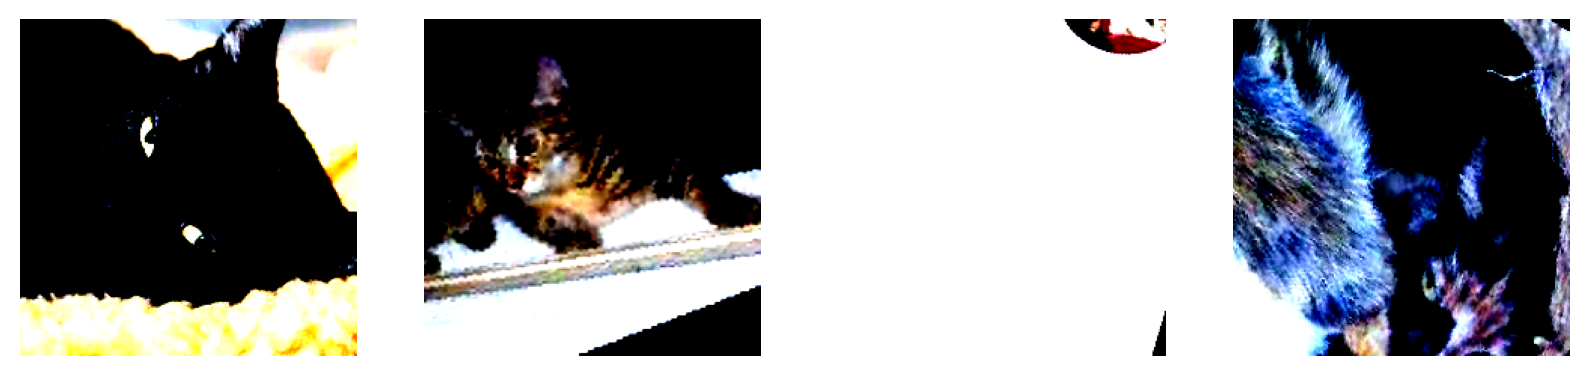

In [15]:


images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

Vos images transform√©es devraient ressembler √† quelque chose comme ceci.




<center>Training examples:</center>


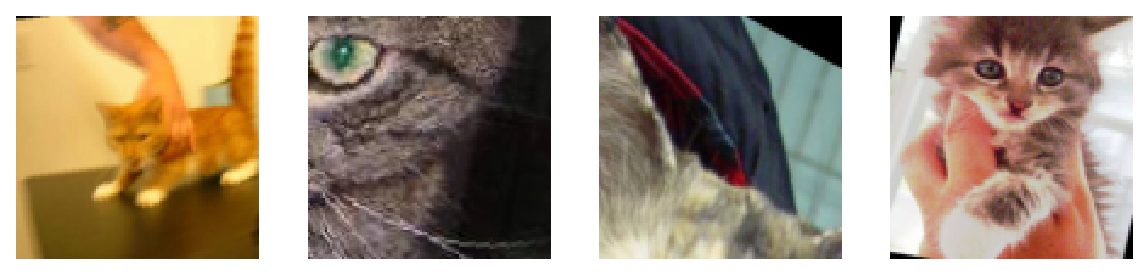

<center>Testing examples:</center>

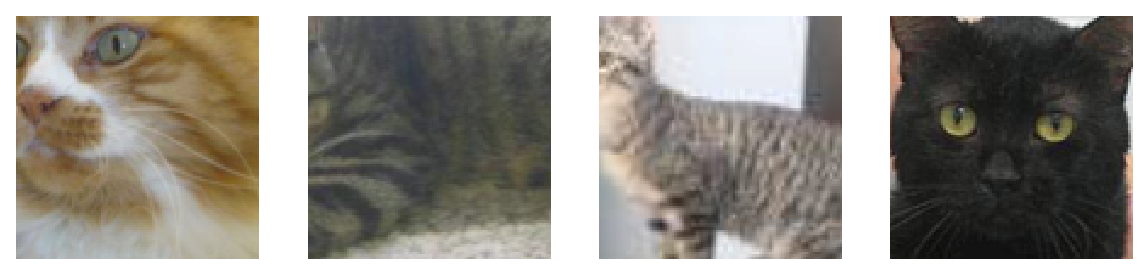


√Ä ce stade, vous devriez √™tre en mesure de charger les donn√©es pour l‚Äôentra√Ænement et le test.  
Vous pouvez maintenant essayer de construire un r√©seau capable de **classer les chats et les chiens**.



In [16]:
# Build a network with CNN to classify cats vs dogs from this dataset
# Creating a model from scratch

import torch.nn as nn
import torch.nn.functional as F

class CatDogClassifier(nn.Module):
    def __init__(self):
        super(CatDogClassifier, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2)  # 2 classes: cat and dog
        
    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        # Flatten the tensor
        x = x.view(-1, 256 * 14 * 14)
        
        # Fully connected layers with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

# Create the model
model = CatDogClassifier()
print(model)

CatDogClassifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)


In [17]:
# Training setup
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Training on: {device}")

# Print dataset info
print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Classes: {train_data.classes}")

Training on: cpu
Training samples: 22500
Test samples: 2500
Classes: ['cat', 'dog']


In [18]:
# Training function
def train_model(model, trainloader, testloader, criterion, optimizer, epochs=5):
    train_losses, test_losses = [], []
    
    for epoch in range(epochs):
        running_loss = 0
        model.train()
        
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # Validation
        test_loss = 0
        accuracy = 0
        model.eval()
        
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                test_loss += criterion(outputs, labels).item()
                
                ps = torch.exp(outputs)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print(f"Epoch {epoch+1}/{epochs}.. "
              f"Train loss: {running_loss/len(trainloader):.3f}.. "
              f"Test loss: {test_loss/len(testloader):.3f}.. "
              f"Test accuracy: {accuracy/len(testloader):.3f}")
    
    return train_losses, test_losses

In [ ]:
# Start training
epochs = 5
train_losses, test_losses = train_model(model, trainloader, testloader, criterion, optimizer, epochs)

# Plot training progress
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

Epoch 1/5.. Train loss: 8.521.. Test loss: 3135.809.. Test accuracy: 0.506


# TP ‚Äì CNN ‚Äúfrom scratch‚Äù vs Transfert Learning (Cats vs Dogs)

## Objectif

Comparer **un mod√®le CNN entra√Æn√© from scratch** et **un mod√®le en transfert d‚Äôapprentissage** sur le m√™me jeu de donn√©es (cats vs dogs). Montrer l‚Äôimpact du transfert learning sur la convergence, la performance et la robustesse.

## Ce qui est **obligatoire**

1. **Deux exp√©riences distinctes**

   * Exp√©rience A : CNN **from scratch** (architecture simple minimum 3 bloc avec conv).
   * Exp√©rience B : **Transfert learning** (ex. ResNet, MobileNet, EfficientNet‚Ä¶), couches finales adapt√©es.
2. **Bonnes pratiques de r√©gularisation**

   * Utiliser **Dropout** ET **Batch Normalization** (justifier o√π et pourquoi).
3. **Suivi des m√©triques**

   * **Training loss**, **Accuracy**, **Pr√©cision**, **Recall** √† chaque √©poque (et id√©alement sur train/val si vous faites une validation).
   * Tracer des **courbes** et **comparer** les deux approches.
4. **Optimisation**

   * Tester au moins **2 optimiseurs** (ex. SGD et Adam).
   * Chercher un **bon learning rate** (essais ou scheduler).
5. **GPU**

   * Entra√Æner **sur GPU** si disponible (v√©rification et mention dans README).
6. **Persistance du mod√®le**

   * **Sauvegarder** le meilleur mod√®le (.pt/.pth) localement (ne **pas** pousser dans GitHub).
   * **Recharger** le mod√®le pour faire le **test final** et rapporter les m√©triques.
7. **Reproductibilit√©**

   * Fixer un **seed**

## Ce qui est **souhait√© (bonus)**

* **Split train/validation** (clair et justifi√©).
* **Data augmentation** raisonnable.
* **Scheduler** (ex. StepLR, CosineAnnealingLR).
* **Matrice de confusion** et quelques **erreurs typiques** comment√©es.
* Journalisation (TensorBoard/W&B) ‚Äî sans pousser les fichiers lourds.

## Donn√©es

* Utilisez le m√™me corpus **Cats vs Dogs** que vu en cours (ou √©quivalent).
* Ne **poussez pas** les donn√©es sur GitHub. Indiquez seulement **comment** les t√©l√©charger/placer.

## Structure du d√©p√¥t GitHub (exemple)

```
cnn-catsdogs-<NomPrenom>/
‚îú‚îÄ notebook.ipynb
‚îú‚îÄ .gitignore
‚îú‚îÄ requirements.txt (ou environment.yml)
‚îú‚îÄ README.md
‚îî‚îÄ LICENSE (optionnel)
```

### `.gitignore` (minimum)

```
data/
*.pt
*.pth
runs/
checkpoints/
```

## Contenu attendu du **README.md**

* **Titre & objectif** du projet.
* **Environnement** ( `pip install -r requirements.txt` ou `conda env create -f environment.yml`).
* **Organisation des donn√©es** (o√π t√©l√©charger, o√π placer les dossiers).
* **Commandes pour entra√Æner** :

  * From scratch : arguments cl√©s (batch size, lr, epochs, optimiser, dropout, BN, scheduler‚Ä¶).
  * Transfert learning : m√™me chose + quelle base (gel des couches ou fine-tuning).
* **Commandes pour √©valuer / recharger le mod√®le** (chemin du checkpoint local).
* **R√©sultats** : tableaux + courbes (loss/accuracy/pr√©cision/recall) pour les deux exp√©riences, **comparaison et analyse** (2‚Äì3 paragraphes).
* **Limites & pistes d‚Äôam√©lioration** (br√®ves).

## √âvaluation (grille indicative)

* Rigueur exp√©rimentale & m√©triques (30 %)
* Qualit√© des mod√®les & optimisation (25 %)
* Clart√© du code & structure du d√©p√¥t (20 %)
* README (reproductibilit√©, analyse, figures) (20 %)
* Bonus (val split, augmentation, scheduler, confusion matrix) (5 %)

## Remise

* **Poussez votre code sur GitHub** (sans donn√©es ni mod√®les).
* Envoyez **le lien du d√©p√¥t** √† **[diallomous@gmail.com](mailto:diallomous@gmail.com)**
* **Date limite : mercredi  22 octobre 2025 √† 18:00 (Africa/Dakar).**

> Rappel : ne chargez pas les fichiers lourds (datasets, `.pt/.pth`). Assurez-vous que votre d√©p√¥t permet de **reproduire** les exp√©riences via les instructions du README.


In [ ]:
# Model evaluation and prediction function
def predict_image(model, image_path, transform, class_names):
    """Predict the class of a single image"""
    from PIL import Image
    
    # Load and preprocess the image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    image = image.to(device)
    
    model.eval()
    with torch.no_grad():
        output = model(image)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
        confidence = probabilities[predicted_class].item()
    
    return class_names[predicted_class], confidence

# Test the model on a few images
import os
import random

# Get some test images
test_cat_dir = "cat_dog_image_classification/Cat_Dog_data/test/cat"
test_dog_dir = "cat_dog_image_classification/Cat_Dog_data/test/dog"

if os.path.exists(test_cat_dir) and os.path.exists(test_dog_dir):
    cat_images = [os.path.join(test_cat_dir, f) for f in os.listdir(test_cat_dir)[:5]]
    dog_images = [os.path.join(test_dog_dir, f) for f in os.listdir(test_dog_dir)[:5]]
    
    print("Sample predictions:")
    for img_path in cat_images + dog_images:
        pred_class, confidence = predict_image(model, img_path, test_transforms, train_data.classes)
        actual_class = "cat" if "cat" in img_path else "dog"
        print(f"Image: {os.path.basename(img_path)} | Predicted: {pred_class} ({confidence:.3f}) | Actual: {actual_class}")
else:
    print("Test directories not found. Please check the data path.")

In [ ]:
# Save the trained model
torch.save(model.state_dict(), "cat_dog_classifier.pth")
print("Model saved as cat_dog_classifier.pth")

# To load the model later:
# model = CatDogClassifier()
# model.load_state_dict(torch.load("cat_dog_classifier.pth"))
# model.eval()